In [ ]:
import json
import sys
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [26]:
FOLLOWERS_FILE = 'insta\\connections\\followers_and_following\\followers_1.json'
FOLLOWING_FILE = 'insta\\connections\\followers_and_following\\following.json'

In [27]:
def load_json_file(filename):
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            return json.load(f)
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while reading '{filename}': {e}")
        return None


In [28]:
def extract_data(data, data_type):
    extracted_data = []
    data_list = []
    
    if not data:
        return []

    try:
        if data_type == 'following':
            data_list = data['relationships_following']
        elif data_type == 'followers':
            if isinstance(data, list):
                data_list = data
            elif 'relationships_followers' in data:
                data_list = data['relationships_followers']
            else:
                raise KeyError("No valid data list found")
    except (KeyError, TypeError):
        return []

    for item in data_list:
        try:
            username = ""
            timestamp = 0
            
            if data_type == 'following':
                username = item['title']
                timestamp = item['string_list_data'][0]['timestamp']
            elif data_type == 'followers':
                username = item['string_list_data'][0]['value']
                timestamp = item['string_list_data'][0]['timestamp']
            
            if username and timestamp:
                date = datetime.fromtimestamp(timestamp)
                extracted_data.append({'username': username, 'date': date})
            
        except (KeyError, IndexError, TypeError):
            pass 
            
    return extracted_data


In [29]:

followers_data = load_json_file(FOLLOWERS_FILE)
following_data = load_json_file(FOLLOWING_FILE)

if followers_data is None or following_data is None:
        print("Could not load files. Exiting.")
        sys.exit(1)

followers_list = extract_data(followers_data, 'followers')
following_list = extract_data(following_data, 'following')

if not followers_list or not following_list:
        print("Could not extract data. Exiting.")
        sys.exit(1)

followers_df = pd.DataFrame(followers_list)
following_df = pd.DataFrame(following_list)

print(f"Total followers: {len(followers_df)}.")
print(f"Total accounts you follow: {len(following_df)}.")

Total followers: 345.
Total accounts you follow: 448.


In [30]:
followers_set = set(followers_df['username'])
following_set = set(following_df['username'])

not_following_back = following_set - followers_set
you_dont_follow_back = followers_set - following_set

print(f"Accounts not following you back: {len(not_following_back)}")
print(f"Accounts you don't follow back:  {len(you_dont_follow_back)}")

Accounts not following you back: 114
Accounts you don't follow back:  11


In [ ]:
print("\nYour 5 Oldest Followers (who are still following you):")
print(followers_df.sort_values(by='date').head(5).to_string(index=False))

print("\n5 Oldest Accounts You Follow (who are still active):")
print(following_df.sort_values(by='date').head(5).to_string(index=False))

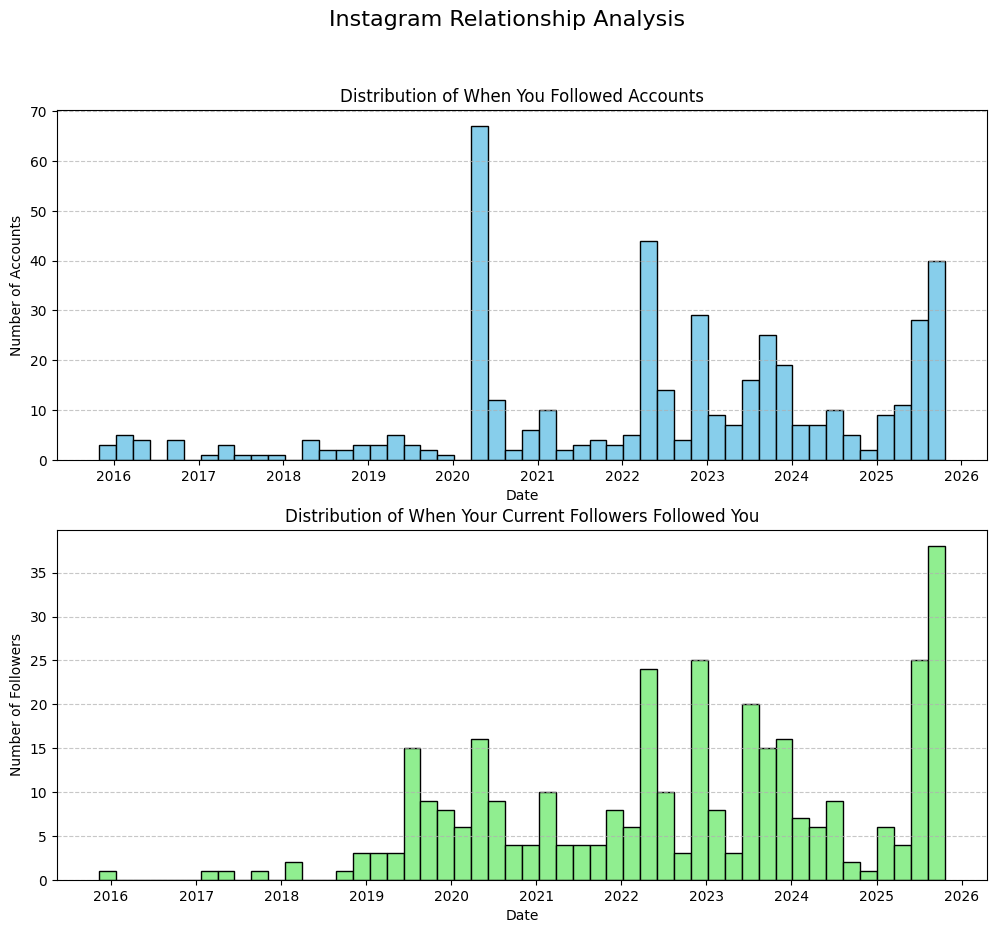

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Instagram Relationship Analysis', fontsize=16)

ax1.hist(following_df['date'], bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of When You Followed Accounts')
ax1.set_ylabel('Number of Accounts')
ax1.set_xlabel('Date')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.hist(followers_df['date'], bins=50, color='lightgreen', edgecolor='black')
ax2.set_title('Distribution of When Your Current Followers Followed You')
ax2.set_ylabel('Number of Followers')
ax2.set_xlabel('Date')
ax2.grid(axis='y', linestyle='--', alpha=0.7)